# Example usage

This notebook demonstrates the main functionality and scenerios that the **esrot1d** package supports.

The package name "**esrot1d**" means: effect-size rules-of-thumb for one-dimensinal functional data.

<br>
<br>

In all probability calculations below only two experimental design scenarios are supported:

- one-sample, assumed normality
- two-sample, assumed normality, equal group sizes and equal group variances

<br>

That is, the main goal of **esrot1d** is NOT to be a comprehensive effect-size calculator. The main goals of **esort1d** are: 

- To demonstrate probability concepts relevant to effect size interpretations for simple scalar (0D) and one-dimensional functional (1D) data
- To support calculations for other documents in this repository this project the attached manuscript

In [1]:
import os
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import rft1d
import esrot1d as e1d

<br>
<br>

## Cohen's d-value calculation

One- and two-sample d-values can be calculated using the `d_1sample` and `d_2sample` functions.

An [example one-sample dataset](https://real-statistics.com/students-t-distribution/one-sample-t-test/one-sample-effect-size/)  from real-statistics.com is replicated below. The expected effect size is -0.57932.

In [2]:

y = np.array( [63, 95, 81, 75, 90, 64, 45, 59, 72, 35,
     58, 84, 90, 38, 100, 80, 68, 49, 68, 60,
     76, 83, 87, 54, 45, 58, 64, 63, 92, 87,
     59, 68, 45, 52, 76, 78, 50, 75, 64, 86] )

d = e1d.stats.d_1sample( y - 78 )
print( d )


-0.5793178515101701


For the two-sample case the group sizes needn't be equal. Below a [second example dataset](https://real-statistics.com/students-t-distribution/two-independent-samples-t-test/two-sample-effect-size/) from real-statistics.com is used, with an expected effect size of 0.96212.

In [3]:

y0 = np.array( [13, 17, 19, 10, 20, 15, 18, 9, 12, 15, 16] )
y1 = np.array( [12, 8, 6, 16, 12, 14, 10, 18, 4, 11] )

d = e1d.stats.d_2sample( y0, y1 )
print( d )


0.9621198233018209


<br>
<br>

## Conversion between d- and t-values

The `d2t` and `t2d` functions can be used to convert between d- and t-values. In both cases, sample size `n` is second required argument, and the `design` keyword argument is either `"1sample"` (default) or `"2sample"`.

In [4]:
d  = e1d.stats.d_1sample( y - 78 )
n  = y.size  # sample size

t  = e1d.stats.d2t( d, n, design='1sample'  )
d1 = e1d.stats.t2d( t, n, design='1sample'  )

print( f"Cohen's d-value:           {d:0.5f}" )
print( f"Converted to t-value:      {t:0.5f}" )
print( f"Converted back to d-value: {d1:0.5f}" )


Cohen's d-value:           -0.57932
Converted to t-value:      -3.66393
Converted back to d-value: -0.57932


The one-sample t-value can be verified using `scipy.stats.ttest_1samp`:

In [5]:
results = scipy.stats.ttest_1samp(y, 78)
print( results )

TtestResult(statistic=np.float64(-3.6639277999347053), pvalue=np.float64(0.0007371026207789329), df=np.int64(39))


For the two-sample sceneraio `n` is the total number of observations. For simplicity only equal group sample sizes and equal group variances are supported.

In [6]:
d = e1d.stats.d_2sample( y0, y1 )
n = 2 * y0.size

t  = e1d.stats.d2t( d, n, design='2sample' )
d1 = e1d.stats.t2d( t, n, design='2sample' )

print( f"Cohen's d-value:           {d:0.5f}" )
print( f"Converted to t-value:      {t:0.5f}" )
print( f"Converted back to d-value: {d1:0.5f}" )

Cohen's d-value:           0.96212
Converted to t-value:      2.25637
Converted back to d-value: 0.96212


<br>
<br>

## Conversion between t- and p-values

The `t2p` and `p2t` functions are the survival and inverse survival functions, respectively. For simple scalar data they are equivalent to **scipy.stats.t.sf** and **scipy.stats.t.isf**, respectively.


In [7]:
n  = 40
v  = n - 1  # degrees of freedom for one-sample case
t  = 1.7

p0 = e1d.stats.t2p( t, v )
p1 = scipy.stats.t.sf(t, v)


t0 = e1d.stats.p2t( p0, v )
t1 = scipy.stats.t.isf(p1, v)


print( f'e1d.stats.t2p result:       p = {p0:.5f}' )
print( f'scipy.stats.t.sf result:    p = {p1:.5f}' )
print()
print( f'e1d.stats.p2t result:       t = {t0:.5f}' )
print( f'scipy.stats.t.isf result:   t = {t1:.5f}' )


e1d.stats.t2p result:       p = 0.04855
scipy.stats.t.sf result:    p = 0.04855

e1d.stats.p2t result:       t = 1.70000
scipy.stats.t.isf result:   t = 1.70000


<br>
<br>

## Conversion between d- and p-values

The `d2p` and `p2d` functions can be used to convert between d- and p-values. These are just convenience functions that chain the conversion functions above:  `d2p` calls `d2t` then `t2p`, and `p2d` calls `p2t` then `t2d`.


In [8]:
n  = 10
d  = 0.5

p0 = e1d.stats.d2p( d, n, design='1sample' )

t1 = e1d.stats.d2t( d, n, design='1sample' )
p1 = e1d.stats.t2p( t1, n-1 )


print( f'e1d.stats.d2p result:   p = {p0:.5f}' )
print( f'd2t then t2p:           p = {p1:.5f}' )


e1d.stats.d2p result:   p = 0.07415
d2t then t2p:           p = 0.07415


In [9]:
n  = 10
p  = 0.05

d0 = e1d.stats.p2d( p, n, design='1sample' )

t1 = e1d.stats.p2t( p, n-1 )
d1 = e1d.stats.t2d( t1, n, design='1sample' )


print( f'e1d.stats.p2d result:   d = {d0:.5f}' )
print( f'p2t then t2d:           d = {d1:.5f}' )

e1d.stats.p2d result:   d = 0.57968
p2t then t2d:           d = 0.57968


<br>
<br>

## Calculations for one-dimensional (1D) functional data

All functions above can be applied to the 1D functional case. Below several examples are provided. For some calculations the following arguments are required:

- `dim = 1` : specifies the 1D functional case
- `Q` : number of discrete domain points used to approximate the function (usually 100 or 101)
- `fwhm` : functional smoothness (full-width at half-maximum)

<br>
<br>

First let's use the `e1d.stats.d_1sample` function to calculate functional Cohen's d for a random 1D one-sample dataset.


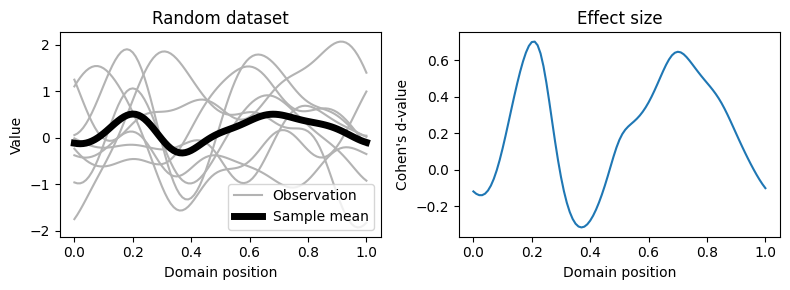

In [10]:

# generate a random dataset:
np.random.seed(1)
Q = 101
w = 20
x = np.linspace(0, 1, Q)      # domain position vector
y = rft1d.randn1d( 8, Q, w )  # args: n.observations, n.domain nodes, fwhm
d = e1d.stats.d_1sample(y)    # Cohen's d


# plot:
fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(8,3), tight_layout=True)
h0 = ax0.plot( x, y.T, color='0.7' )[0]
h1 = ax0.plot( x, y.mean(axis=0), 'k', lw=5 )[0]
ax0.legend([h0,h1], ['Observation', 'Sample mean'] )
plt.setp(ax0, xlabel='Domain position', ylabel='Value', title='Random dataset')
ax1.plot( x, d )
plt.setp(ax1, xlabel='Domain position', ylabel="Cohen's d-value", title='Effect size')
plt.show()


Net let's calculate the probability associated with the domain-wide maximum d-value:

In [11]:

dmax = d.max()
n    = y.shape[0]
p    = e1d.stats.d2p(dmax, n, dim=1, design='1sample', Q=Q, fwhm=w)

print( f'Maximum domain-wide d-value:  {dmax:.5f}' )
print( f'p-value:                      {p:.5f}' )


Maximum domain-wide d-value:  0.70262
p-value:                      0.32284


<br>
<br>

If the smoothness (FWHM) value is not known, as is usually the case for experimental data, it may be estimated from the residuals using the 
`estimate_fwhm function`:

<br>
<br>

In [12]:

res = y - y.mean(axis=0)

we  = e1d.smoothness.estimate_fwhm( res )

print( f'Known population smoothness: fwhm = {w}' )
print( f'Estimated smoothness:        fwhm = {we:.3f}' )


Known population smoothness: fwhm = 20
Estimated smoothness:        fwhm = 19.445


<br>
<br>

**NOTE!**  Just as sample mean and sample standard deviation (SD) are estimates of the population mean and SD, so too is the sample FWHM an estimate of the population FWHM.  Similarly, as the sample grows larger the estimated FWHM is expected to converge to the population FWHM, as shown in the cell below.

<br>
<br>

In [23]:

np.random.seed(2)
y1   = rft1d.randn1d( 5000, Q, w )  # larger sample
res1 = y1 - y1.mean(axis=0)
we1  = e1d.smoothness.estimate_fwhm( res1 )

print( f'Estimated smoothness:        fwhm = {we1:.3f}' )


Estimated smoothness:        fwhm = 19.987


<br>
<br>

## Effect size interpretations

The baseline:

In [27]:
baseline = e1d.BaselineScenario()

print( baseline )

BaselineScenario:
    design = two-sample
    n      = 20
    v      = 18
    dc     = [0.01 0.2  0.5  0.8  1.2  2.  ]
    pc     = [4.9120e-01 3.3003e-01 1.3913e-01 4.5241e-02 7.5904e-03 1.4728e-04]



In [29]:
print( baseline.cv )

Critical d-values:
  Very small = 0.010  (p=0.4912)
       Small = 0.200  (p=0.33003)
      Medium = 0.500  (p=0.13913)
       Large = 0.800  (p=0.045241)
  Very large = 1.200  (p=0.0075904)
        Huge = 2.000  (p=0.00014728)



In [31]:
cv = e1d.stats.d_critical(20, dim=0, design='2sample')

print( cv )

Critical d-values:
  Very small = 0.010  (p=0.4912)
       Small = 0.200  (p=0.33003)
      Medium = 0.500  (p=0.13913)
       Large = 0.800  (p=0.045241)
  Very large = 1.200  (p=0.0075904)
        Huge = 2.000  (p=0.00014728)



In [33]:
cv = e1d.stats.d_critical(10, dim=0, design='2sample')

print( cv )

Critical d-values:
  Very small = 0.014  (p=0.4912)
       Small = 0.289  (p=0.33003)
      Medium = 0.736  (p=0.13913)
       Large = 1.217  (p=0.045241)
  Very large = 1.946  (p=0.0075904)
        Huge = 3.848  (p=0.00014728)



In [35]:
cv = e1d.stats.d_critical(20, dim=1, design='2sample', Q=101, fwhm=21.9)

print( cv )

Critical d-values:
  Very small = 0.578  (p=0.4912)
       Small = 0.756  (p=0.33003)
      Medium = 1.033  (p=0.13913)
       Large = 1.321  (p=0.045241)
  Very large = 1.730  (p=0.0075904)
        Huge = 2.619  (p=0.00014728)



In [36]:
## custom baseline here

<br>
<br>

## Example dataset analysis

Let's load an example dataset and plot the means and effect size.

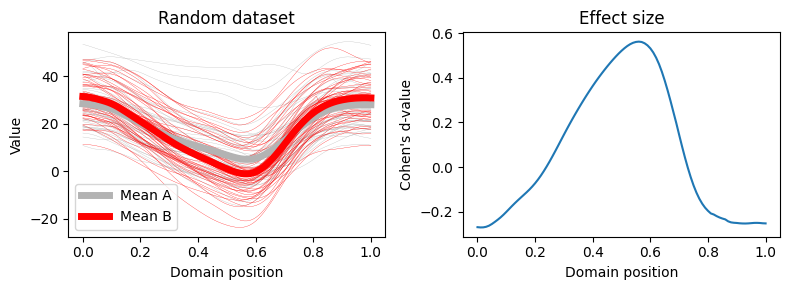

In [38]:

fpathH5 = os.path.join( e1d.dirREPO, 'analysis', 'Bertaux2022', 'data', 'means.h5')
data    = e1d.io.load_h5( fpathH5 )


# separate data into groups (right limb only;  results are similar for left-limb only)
# group 0:  healthy (group=0)
# group 1:  OA, month 0 (group=1, sess=0)
# group 2:  OA, month 6 (group=1, sess=1)
limb   = 1
oasubj = e1d.util.unique_sorted( data['subj'][(data['affected_limb']==limb) & data['sess']==1] )
y1     = np.vstack([data['y'][  (data['subj']==u) & (data['limb']==limb) & (data['sess']==0) ]  for u in oasubj])
y2     = np.vstack([data['y'][  (data['subj']==u) & (data['limb']==limb) & (data['sess']==1) ]  for u in oasubj])
d      = e1d.stats.d_1sample(y1 - y2)


# plot:
fig,(ax0,ax1) = plt.subplots(1, 2, figsize=(8,3), tight_layout=True)
Q  = y1.shape[1]
x  = np.linspace(0, 1, Q)
h0 = ax0.plot( x, y1.T, color='0.7', lw=0.2 )[0]
h1 = ax0.plot( x, y2.T, color='r', lw=0.2 )[0]
h2 = ax0.plot( x, y1.mean(axis=0), '0.7', lw=5 )[0]
h3 = ax0.plot( x, y2.mean(axis=0), 'r', lw=5 )[0]
ax0.legend([h2,h3], ['Mean A', 'Mean B'] )
plt.setp(ax0, xlabel='Domain position', ylabel='Value', title='Random dataset')
ax1.plot( x, d )
plt.setp(ax1, xlabel='Domain position', ylabel="Cohen's d-value", title='Effect size')
plt.show()


In [40]:
res1  = y1 - y1.mean(axis=0)
res2  = y2 - y2.mean(axis=0)
efwhm = e1d.smoothness.estimate_fwhm( np.vstack([res1,res2]) ) 

# w = rft1d.geom.estimate_

print( efwhm )

62.167861032674104
